# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paso 1: Cargar los datos que vamos a realizar

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.to_csv('../data/raw/AB_NYC_2019.csv', index=False)

## Paso 2: Exploración y limpieza de datos

In [4]:
df.shape

(48895, 16)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [165]:
print("Existen 48895 registros y observamos que hay 16 columnas de entre las cuales vamos a usar para poder predecir el precio de cada apartamento.")
print("Podemos observar que las columnas last_review y reviews_per_month contienen mas de 1000 valores nulos.")
print("Los datos cuentan con 10 caracteristicas numericas y 6 caracteristicas categoricas")

Existen 48895 registros y observamos que hay 16 columnas de entre las cuales vamos a usar para poder predecir el precio de cada apartamento.
Podemos observar que las columnas last_review y reviews_per_month contienen mas de 1000 valores nulos.
Los datos cuentan con 10 caracteristicas numericas y 6 caracteristicas categoricas


In [166]:
print(df.drop("id", axis = 1).duplicated().sum())
print("Observamos que no hay registros duplicados")

0
Observamos que no hay registros duplicados


In [167]:
df.drop(["id", "name", "host_id", "host_name", "last_review"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Paso 3: Análisis de variables univariante

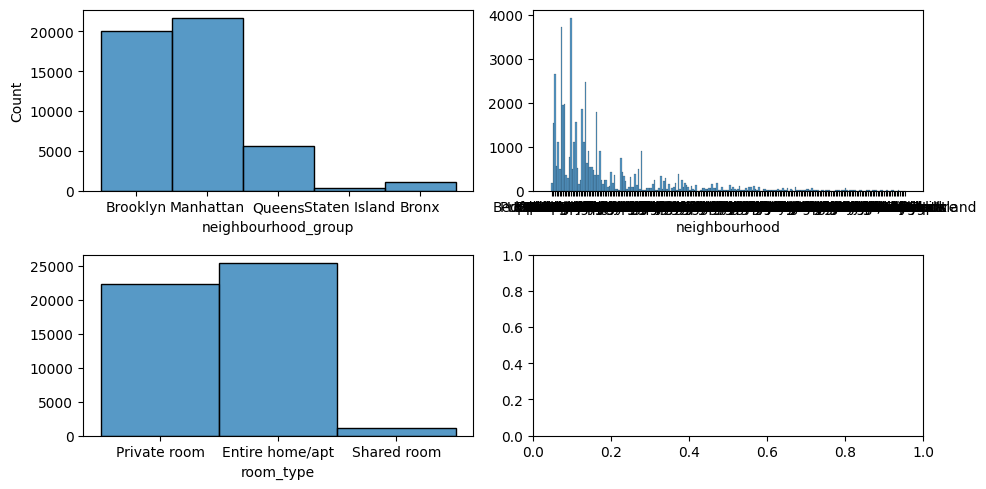

In [168]:
fig, axis = plt.subplots(2, 2, figsize = (10, 5))

sns.histplot(ax = axis[0, 0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "room_type").set(ylabel = None)

plt.tight_layout()
plt.show()

In [169]:
df["neighbourhood"].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [170]:
df["room_type"].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [171]:
print("Observamos que hay 5 grupos de vecindarios pero los que tienen mas habitaciones son Brooklyn y Manhattan")

print("Observamos que los vecindarios con mayor numero de departamentos son: " \
"1. Williamsburg con 3920 departamentos. " \
"2. Bedford-Stuyvesant con 3714 departamentos. " \
"3. Harlem con 2658 departamentos.")

print("Observamos que hay 3 tipos de cuartos:" \
"1. Casa/apartamento entero. " \
"2. Apartamento privado. " \
"3. Apartamento compartido. " \
"Siendo este ultimo con menor cantidad de demanda.")

Observamos que hay 5 grupos de vecindarios pero los que tienen mas habitaciones son Brooklyn y Manhattan
Observamos que los vecindarios con mayor numero de departamentos son: 1. Williamsburg con 3920 departamentos. 2. Bedford-Stuyvesant con 3714 departamentos. 3. Harlem con 2658 departamentos.
Observamos que hay 3 tipos de cuartos:1. Casa/apartamento entero. 2. Apartamento privado. 3. Apartamento compartido. Siendo este ultimo con menor cantidad de demanda.


In [172]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


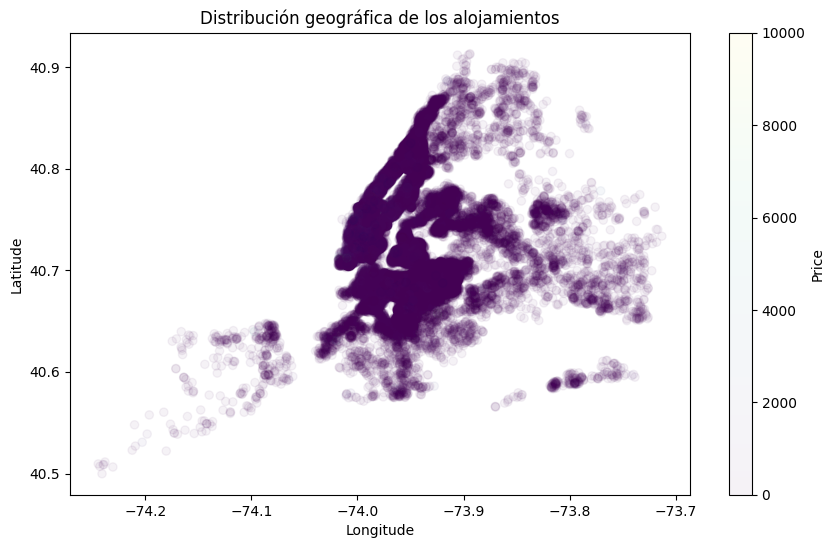

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.05, c=df['price'], cmap='viridis')
plt.colorbar(label='Price')
plt.title('Distribución geográfica de los alojamientos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [174]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
Inferior = Q1_price - 1.5 * IQR_price
Superior = Q3_price + 1.5 * IQR_price

Q1_reviews = df['number_of_reviews'].quantile(0.25)
Q3_reviews = df['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
Inf = Q1_reviews - 1.5 * IQR_reviews
Sup = Q3_reviews + 1.5 * IQR_reviews

df_limpio = df[(df['price'] >= Inferior) & (df['price'] <= Superior)]
df_limpio = df_limpio[(df_limpio['number_of_reviews'] >= Inf) & (df_limpio['number_of_reviews'] <= Sup)]


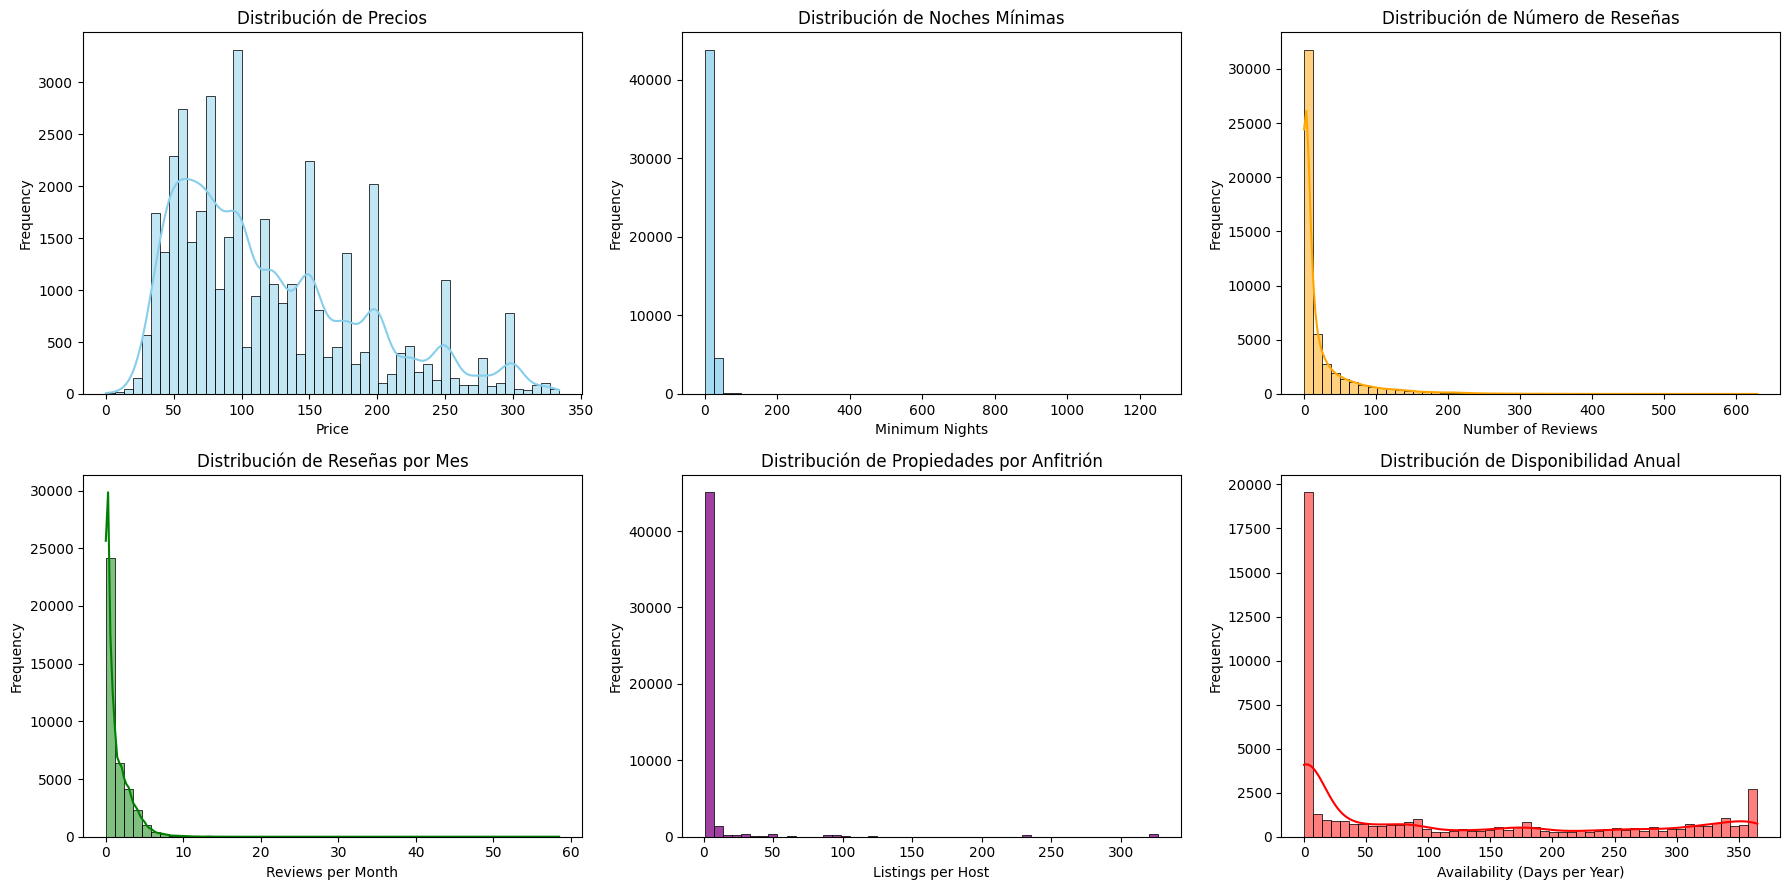

In [175]:
plt.figure(figsize=(18, 9))

# Histograma de 'price' (eliminando outliers)
plt.subplot(2, 3, 1)
sns.histplot(df_limpio['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribución de Precios')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histograma de 'minimum_nights'
plt.subplot(2, 3, 2)
sns.histplot(df['minimum_nights'], kde=False, bins=50, color='skyblue')
plt.title('Distribución de Noches Mínimas')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Histograma de 'number_of_reviews' (eliminando outliers)
plt.subplot(2, 3, 3)
sns.histplot(df['number_of_reviews'], kde=True, bins=50, color='orange')
plt.title('Distribución de Número de Reseñas')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

# Histograma de 'reviews_per_month'
plt.subplot(2, 3, 4)
sns.histplot(df['reviews_per_month'], kde=True, bins=50, color='green')
plt.title('Distribución de Reseñas por Mes')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')

# Histograma de 'calculated_host_listings_count'
plt.subplot(2, 3, 5)
sns.histplot(df['calculated_host_listings_count'], kde=False, bins=50, color='purple')
plt.title('Distribución de Propiedades por Anfitrión')
plt.xlabel('Listings per Host')
plt.ylabel('Frequency')

# Histograma de 'availability_365'
plt.subplot(2, 3, 6)
sns.histplot(df['availability_365'], kde=True, bins=50, color='red')
plt.title('Distribución de Disponibilidad Anual')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Paso 4: Análisis de variables multivariante

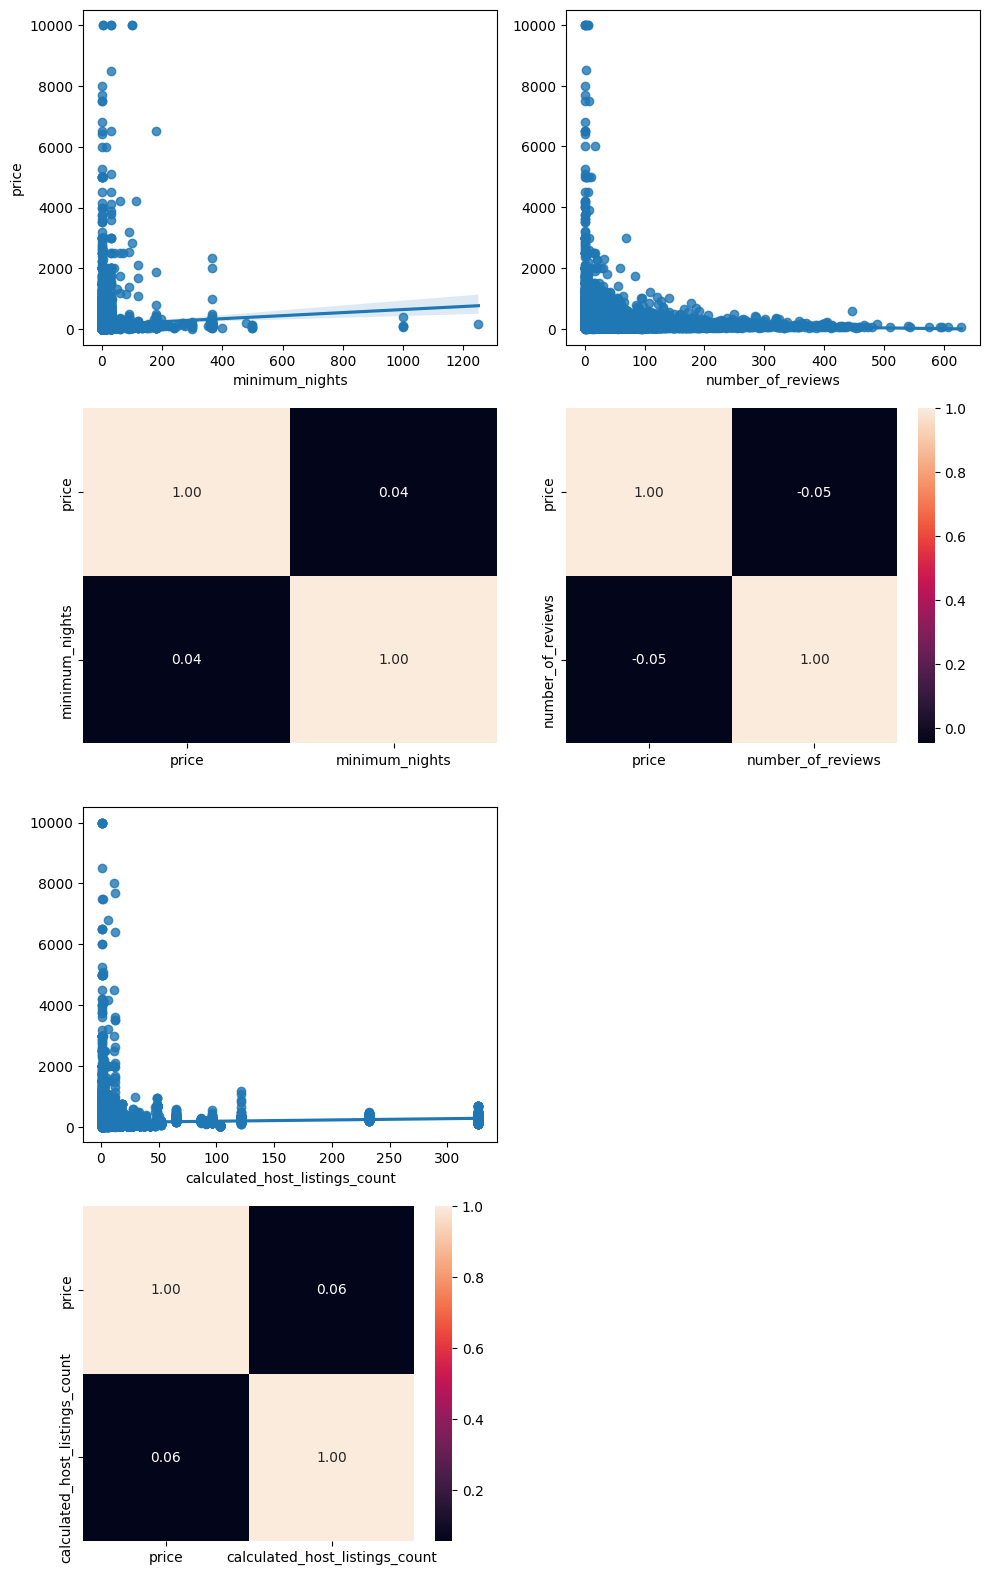

In [176]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

In [177]:
print("No existe relacion entre el precio y las variablesnumericas anteriores")

No existe relacion entre el precio y las variablesnumericas anteriores


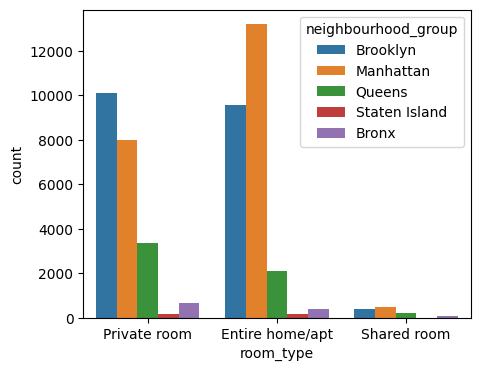

In [178]:
fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()

In [179]:
print("Observamos que Brooklyn es el vecindario con mayor numero de habitaciones privadas para alquilar." \
"Manhattan es el vecindario con mayor numero de casas/apartamentos enteros para alquilar.")

Observamos que Brooklyn es el vecindario con mayor numero de habitaciones privadas para alquilar.Manhattan es el vecindario con mayor numero de casas/apartamentos enteros para alquilar.


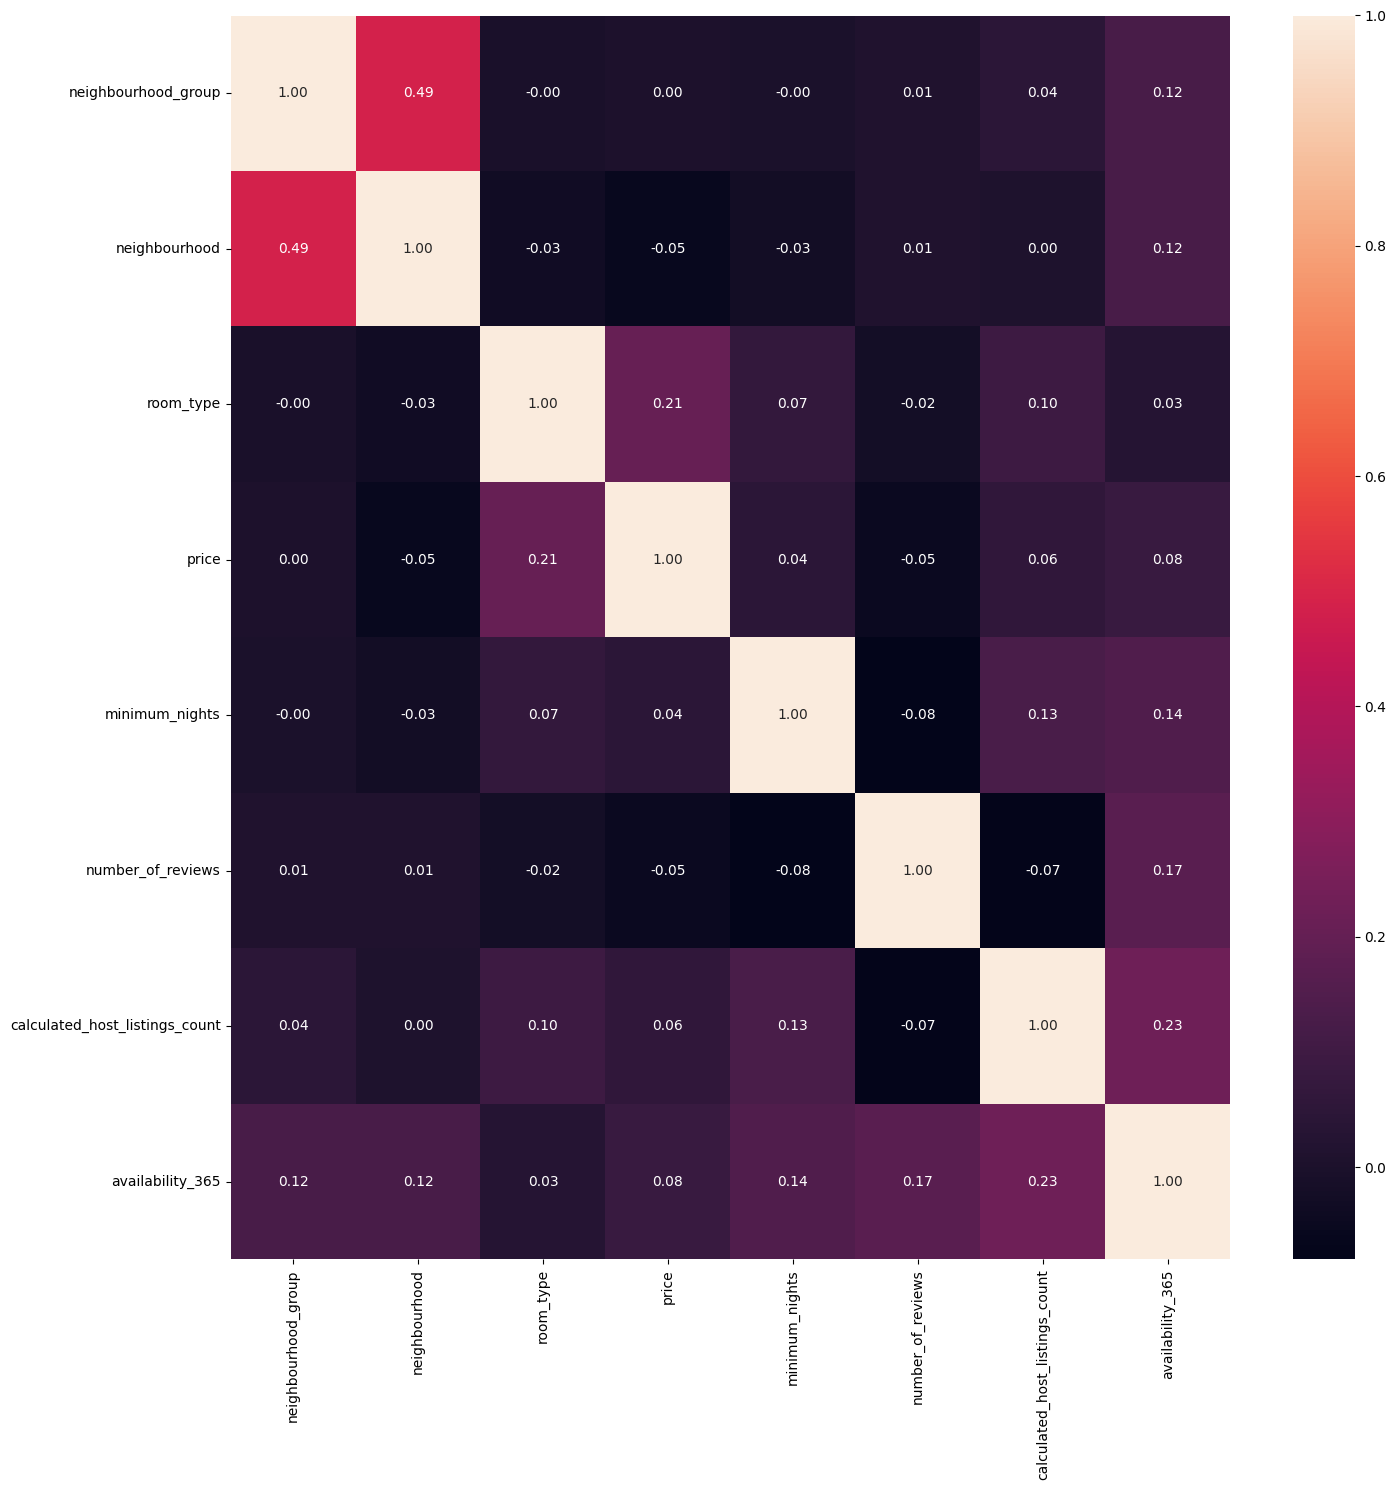

In [180]:
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

## Paso 5: Ingeniería de características

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


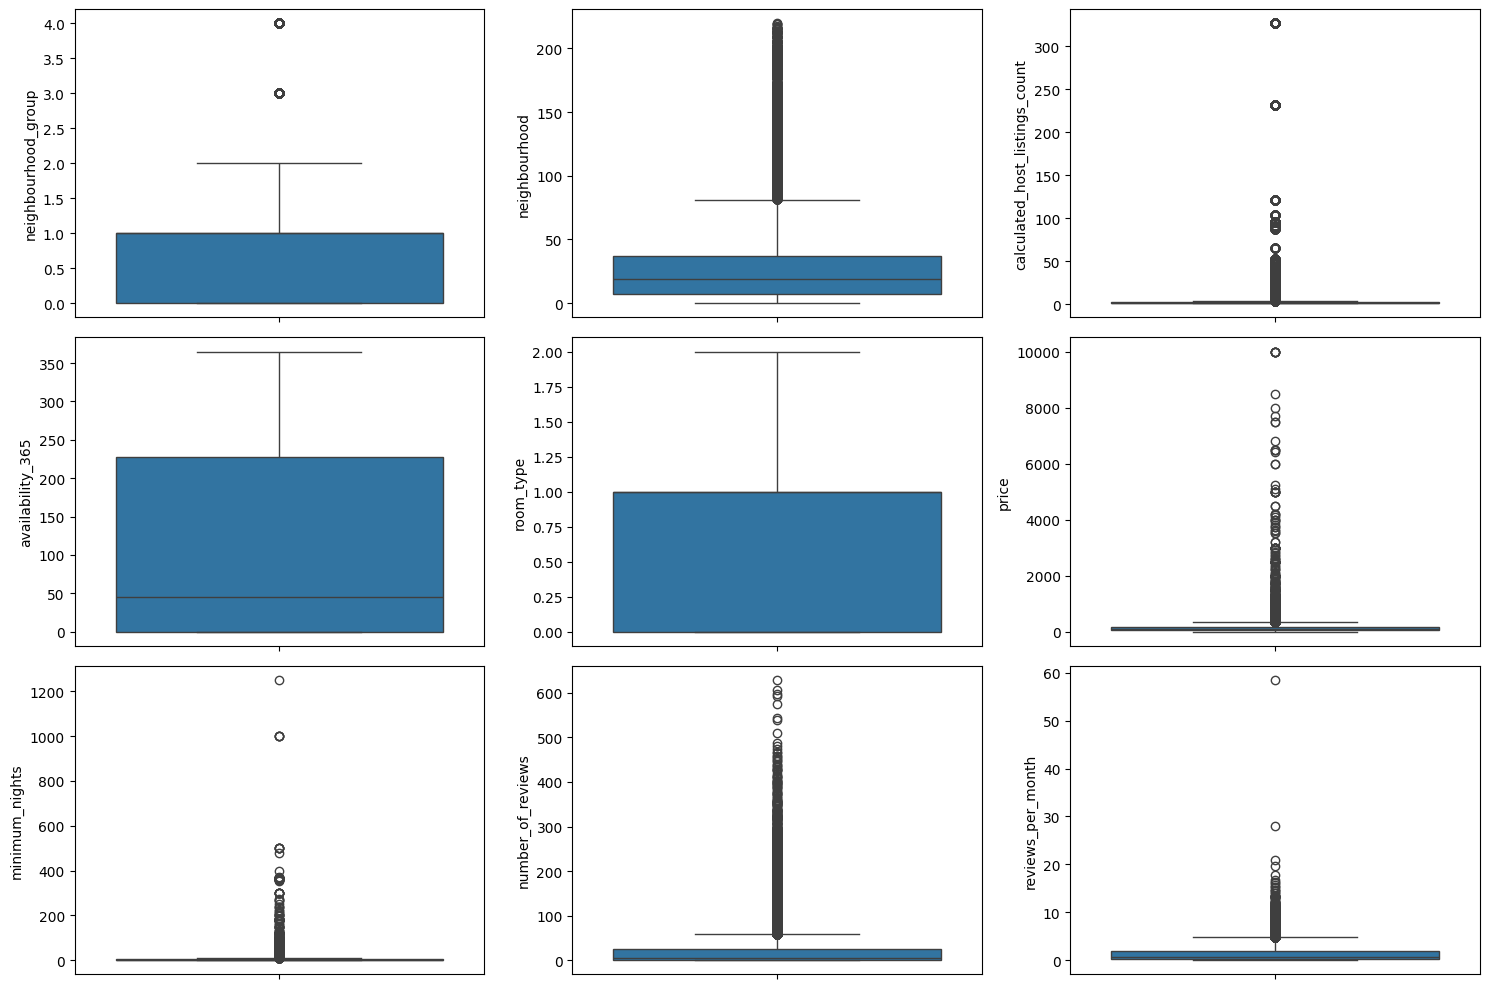

In [182]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = df, y = "neighbourhood")
sns.boxplot(ax = axis[0, 2], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = df, y = "availability_365")
sns.boxplot(ax = axis[1, 1], data = df, y = "room_type")
sns.boxplot(ax = axis[1, 2], data = df, y = "price")
sns.boxplot(ax = axis[2, 0], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[2, 1], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 2], data = df, y = "reviews_per_month")

plt.tight_layout()
plt.show()

In [183]:
print("Se obserba que hay muchos valores que tienen outliers, entre los cuales tenemos el numero de reseñas, reseñas mensuales, minimo de noches, distribucion de propiedades por anfitrion y precio.")

Se obserba que hay muchos valores que tienen outliers, entre los cuales tenemos el numero de reseñas, reseñas mensuales, minimo de noches, distribucion de propiedades por anfitrion y precio.


In [184]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [185]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los limites superior e inferior son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuantilico de {round(price_iqr, 2)}")

Los limites superior e inferior son 334.0 y -90.0, con un rango intercuantilico de 106.0


In [186]:
df = df[df["price"] > 0]

In [187]:
count_0 = df[df["price"] == 0].shape[0]
count_1 = df[df["price"] == 1].shape[0]

print("Contador 0: ", count_0)
print("Contador 1: ", count_1)

Contador 0:  0
Contador 1:  0


In [188]:
nights_stats = df["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [189]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

limite_superior = nights_stats["75%"] + 1.5 * nights_iqr
limite_inferior = nights_stats["25%"] - 1.5 * nights_iqr

print(f"El limite superior e inferior para los outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuantilico de {round(nights_iqr, 2)}")

El limite superior e inferior para los outliers son 334.0 y -90.0, con un rango intercuantilico de 4.0


In [190]:
df = df[df["minimum_nights"] <= 15]

In [191]:
count_0 = df[df["minimum_nights"] == 0].shape[0]
count_1 = df[df["minimum_nights"] == 1].shape[0]
count_2 = df[df["minimum_nights"] == 2].shape[0]
count_3 = df[df["minimum_nights"] == 3].shape[0]
count_4 = df[df["minimum_nights"] == 4].shape[0]


print("Contador de 0: ", count_0)
print("Contador de 1: ", count_1)
print("Contador de 2: ", count_2)
print("Contador de 3: ", count_3)
print("Contador de 4: ", count_4)

Contador de 0:  0
Contador de 1:  12717
Contador de 2:  11693
Contador de 3:  7998
Contador de 4:  3302


In [192]:
review_stats = df["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [193]:
review_iqr = review_stats["75%"] - review_stats["25%"]

limite_superior = review_stats["75%"] + 1.5 * review_iqr
limite_inferior = review_stats["25%"] - 1.5 * review_iqr

print(f"Los limites superior e inferior para los outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuantilico de {round(review_iqr, 2)}")

Los limites superior e inferior para los outliers son 334.0 y -90.0, con un rango intercuantilico de 26.0


In [194]:
hostlist_stats = df["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [196]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

limite_superior = hostlist_stats["75%"] + 1.5 * hostlist_iqr
limite_inferior = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los limites superior e inferior para los outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuantilico de {round(hostlist_iqr, 2)}")

Los limites superior e inferior para los outliers son 334.0 y -90.0, con un rango intercuantilico de 1.0


In [197]:
count_0 = sum(1 for x in df["calculated_host_listings_count"] if x in range(0, 5))
count_1 = df[df["calculated_host_listings_count"] == 1].shape[0]
count_2 = df[df["calculated_host_listings_count"] == 2].shape[0]

print("Contador de 0: ", count_0)
print("Contador de 1: ", count_1)
print("Contador de 2: ", count_2)

Contador de 0:  40308
Contador de 1:  30253
Contador de 2:  6179


In [198]:
df = df[df["calculated_host_listings_count"] > 4]

In [199]:
df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 442
neighbourhood                       0
neighbourhood_group                 0
latitude                            0
longitude                           0
price                               0
room_type                           0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [200]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


## Paso 6: Selección de características

In [201]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


In [202]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)